In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore")

In [124]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)


## Part1

In [127]:
df2022 = pd.read_csv("players_22.csv")
df2022.shape


(19239, 110)

In [128]:

#out target variable has not any missing row

df2022.overall.isnull().sum()


0

In [129]:

#we drop unnecessary variables like player name, player nation, short name, club jersey number
#date of birth etc. 

df2022 = df2022[["sofifa_id","player_positions","overall","value_eur","wage_eur","release_clause_eur",
                 "age","height_cm","weight_kg","preferred_foot","weak_foot","skill_moves",
                 "international_reputation","work_rate","body_type",
                 "shooting","passing","dribbling","defending","physic","attacking_crossing",
                 "attacking_finishing","attacking_heading_accuracy","attacking_short_passing",
                 "attacking_volleys","skill_dribbling","skill_curve","skill_fk_accuracy",
                 "skill_long_passing","skill_ball_control","movement_acceleration",
                 "movement_sprint_speed","movement_agility","movement_reactions","movement_balance",
                 "power_shot_power","power_jumping","power_stamina","power_strength",
                 "power_long_shots","mentality_aggression","mentality_interceptions",
                 "mentality_positioning","mentality_vision","mentality_penalties",
                 "mentality_composure","defending_marking_awareness","defending_standing_tackle",
                 "defending_sliding_tackle","goalkeeping_diving","goalkeeping_handling",
                 "goalkeeping_kicking","goalkeeping_positioning","goalkeeping_reflexes"]]



In [130]:
df2022.shape

(19239, 54)

In [7]:
df2022.head()

,sofifa_id,player_positions,overall,value_eur,wage_eur,release_clause_eur,age,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,"RW, ST, CF",93,78000000.0,320000.0,144300000.0,34,170,72,Left,4,4,5,Medium/Low,Unique,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8
1,188545,ST,92,119500000.0,270000.0,197200000.0,32,185,81,Right,4,4,5,High/Medium,Unique,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10
2,20801,"ST, LW",91,45000000.0,270000.0,83300000.0,36,187,83,Right,4,5,5,High/Low,Unique,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11
3,190871,"LW, CAM",91,129000000.0,270000.0,238700000.0,29,175,68,Right,5,5,5,High/Medium,Unique,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11
4,192985,"CM, CAM",91,125500000.0,350000.0,232200000.0,30,181,70,Right,5,4,4,High/High,Unique,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13


In [137]:
#in player_positions feature, we have more than one, 
#we form a data frame that consist of unique position in the data set
#we will use this data frame to make reduction original positions

df2022["unique_positions"] = df2022["player_positions"].apply(lambda x: x.strip().split(",") )

positions = []

for i in range(len(df2022["unique_positions"])):
    for j in df2022["unique_positions"][i]:
        if j.strip() not in positions:
            positions.append(j.strip())
        else:
            pass

#unique positions in the data set
#positions
    

In [138]:

position_dict = {   "GK" : "Goalkeeper",
                    "CB" : "Defender", 
                    "RB" : "Defender", 
                    "LB" : "Defender", 
                    "RWB" : "Defender", 
                    "LWB" : "Defender",
                    "CAM" : "Midfielder",
                    "CM" : "Midfielder", 
                    "CDM" : "Midfielder", 
                    "LM" : "Midfielder",
                    "RM" : "Midfielder" ,
                    "RW" : "Forward", 
                    "ST" : "Forward", 
                    "CF" : "Forward", 
                    "LW" : "Forward"
}

df_positions = pd.concat( [pd.Series(position_dict.keys() ), pd.Series(position_dict.values())] , axis=1)

df_positions.rename(columns={0:"Position",1:"Position_Group"}, inplace=True)

#here is the positions and corresponding group for categorical feature 
df_positions.sample(4)


,Position,Position_Group
12,ST,Forward
4,RWB,Defender
13,CF,Forward
6,CAM,Midfielder


In [139]:
df2022.player_positions = df2022.player_positions.apply(lambda x: x.strip().split(",")[0])

#since we have multiple positions for one player,
#we split them into only one position, first position info is the most regarding one,
#therefore, for every player with the help of this method has one position
df2022.head()


,sofifa_id,player_positions,overall,value_eur,wage_eur,release_clause_eur,age,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,unique_positions
0,158023,RW,93,78000000.0,320000.0,144300000.0,34,170,72,Left,4,4,5,Medium/Low,Unique,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,"[RW, ST, CF]"
1,188545,ST,92,119500000.0,270000.0,197200000.0,32,185,81,Right,4,4,5,High/Medium,Unique,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,[ST]
2,20801,ST,91,45000000.0,270000.0,83300000.0,36,187,83,Right,4,5,5,High/Low,Unique,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,"[ST, LW]"
3,190871,LW,91,129000000.0,270000.0,238700000.0,29,175,68,Right,5,5,5,High/Medium,Unique,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,"[LW, CAM]"
4,192985,CM,91,125500000.0,350000.0,232200000.0,30,181,70,Right,5,4,4,High/High,Unique,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,"[CM, CAM]"


In [140]:
#we merge data frames in order to group positions info into one columns
#our new feature is "Position_Group"

df2022 = df2022.merge(df_positions, how="inner", left_on="player_positions", right_on="Position")
df2022.drop(["player_positions","unique_positions","Position"], axis=1, inplace=True)


df2022.head()


,sofifa_id,overall,value_eur,wage_eur,release_clause_eur,age,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,Position_Group
0,158023,93,78000000.0,320000.0,144300000.0,34,170,72,Left,4,4,5,Medium/Low,Unique,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,Forward
1,209331,89,101000000.0,270000.0,186900000.0,29,175,71,Left,3,4,4,High/Medium,Unique,87.0,81.0,90.0,45.0,75.0,79,91,59,84,81,90,83,69,75,89,89,91,91,92,91,82,69,85,75,84,63,55,91,83,86,90,38,43,41,14,14,9,11,14,Forward
2,183898,87,49500000.0,160000.0,91600000.0,33,180,69,Left,2,5,4,High/Medium,Unique,81.0,86.0,87.0,48.0,69.0,88,79,51,84,78,88,91,88,82,87,83,83,94,84,76,83,73,78,62,86,73,42,84,88,73,86,41,55,52,10,7,11,12,11,Forward
3,204485,86,65500000.0,220000.0,121200000.0,30,179,67,Left,4,5,3,Medium/Medium,Unique,79.0,81.0,90.0,38.0,60.0,81,81,48,83,76,91,85,78,75,91,84,79,92,81,88,79,56,75,57,79,48,39,80,84,70,84,45,31,22,15,9,13,11,6,Forward
4,208670,84,42500000.0,170000.0,78600000.0,28,181,65,Left,2,5,3,High/High,Unique,76.0,87.0,83.0,50.0,65.0,88,73,52,86,74,83,90,78,89,85,79,77,85,84,78,83,35,79,58,77,73,52,82,89,67,79,44,56,40,11,7,11,8,14,Forward


In [141]:
#we show missing values according to colıumns we have
df2022.isnull().sum()


sofifa_id                         0
overall                           0
value_eur                        74
wage_eur                         61
release_clause_eur             1176
age                               0
height_cm                         0
weight_kg                         0
preferred_foot                    0
weak_foot                         0
skill_moves                       0
international_reputation          0
work_rate                         0
body_type                         0
shooting                       2132
passing                        2132
dribbling                      2132
defending                      2132
physic                         2132
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                       0
skill_fk_accuracy                 0
skill_long_passing          

In [142]:

#while several features are just special for goalkeepers, some others  
#are only used for non goalkeepers (players), so we need to transform them into same feature

print(df2022.loc[df2022.shooting.isnull()==True]["Position_Group"].unique())
print(df2022.loc[df2022.passing.isnull()==True]["Position_Group"].unique())
print(df2022.loc[df2022.dribbling.isnull()==True]["Position_Group"].unique())
print(df2022.loc[df2022.defending.isnull()==True]["Position_Group"].unique())
print(df2022.loc[df2022.physic.isnull()==True]["Position_Group"].unique())



['Goalkeeper']
['Goalkeeper']
['Goalkeeper']
['Goalkeeper']
['Goalkeeper']


In [144]:
#shooting - goalkeeping_handling 
#passing - goalkeeping_kicking 
#dribbling -  goalkeeping_diving
#defending - goalkeeping_positioning
#physic - goalkeeping_reflexes 

df2022.shooting = np.where( df2022.shooting.isna(), 
                               df2022.goalkeeping_handling,
                                 df2022.shooting )

df2022.passing = np.where( df2022.passing.isna(), 
                               df2022.goalkeeping_kicking,
                                 df2022.passing )

df2022.dribbling = np.where( df2022.dribbling.isna(), 
                               df2022.goalkeeping_diving,
                                 df2022.dribbling )

df2022.defending = np.where( df2022.defending.isna(), 
                               df2022.goalkeeping_positioning,
                                 df2022.defending )

df2022.physic = np.where( df2022.physic.isna(), 
                               df2022.goalkeeping_reflexes,
                                 df2022.physic )


for i in df2022.columns:
    
    if i.startswith("goalkeeping"):
        df2022.drop(i, axis=1, inplace=True)
        
df2022.columns


Index(['sofifa_id', 'overall', 'value_eur', 'wage_eur', 'release_clause_eur',
       'age', 'height_cm', 'weight_kg', 'preferred_foot', 'weak_foot',
       'skill_moves', 'international_reputation', 'work_rate', 'body_type',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'def

In [145]:
#only three features of all is still missing 

df_missing = pd.DataFrame(pd.Series(df2022.isnull().sum() )).sort_values(by=0,ascending=False)
df_missing.loc[df_missing[0] > 0]


,0
release_clause_eur,1176
value_eur,74
wage_eur,61


In [146]:
#we show how correlated value, wage and release clause features,
#it is certain that two of them should be dropped from the data set

df2022[["value_eur","wage_eur","release_clause_eur"]].corr()



,value_eur,wage_eur,release_clause_eur
value_eur,1.000000,0.823527,0.99546
wage_eur,0.823527,1.000000,0.82133
release_clause_eur,0.995460,0.821330,1.00000


In [147]:
#the least missing values are in the wage_eur columns, therefore we will only keep 
#wage column and we will exclude rest of them

df2022.drop(["value_eur","release_clause_eur"], axis=1, inplace=True)
df2022.head()


,sofifa_id,overall,wage_eur,age,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,Position_Group
0,158023,93,320000.0,34,170,72,Left,4,4,5,Medium/Low,Unique,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,Forward
1,209331,89,270000.0,29,175,71,Left,3,4,4,High/Medium,Unique,87.0,81.0,90.0,45.0,75.0,79,91,59,84,81,90,83,69,75,89,89,91,91,92,91,82,69,85,75,84,63,55,91,83,86,90,38,43,41,Forward
2,183898,87,160000.0,33,180,69,Left,2,5,4,High/Medium,Unique,81.0,86.0,87.0,48.0,69.0,88,79,51,84,78,88,91,88,82,87,83,83,94,84,76,83,73,78,62,86,73,42,84,88,73,86,41,55,52,Forward
3,204485,86,220000.0,30,179,67,Left,4,5,3,Medium/Medium,Unique,79.0,81.0,90.0,38.0,60.0,81,81,48,83,76,91,85,78,75,91,84,79,92,81,88,79,56,75,57,79,48,39,80,84,70,84,45,31,22,Forward
4,208670,84,170000.0,28,181,65,Left,2,5,3,High/High,Unique,76.0,87.0,83.0,50.0,65.0,88,73,52,86,74,83,90,78,89,85,79,77,85,84,78,83,35,79,58,77,73,52,82,89,67,79,44,56,40,Forward


In [148]:
#we would not prefer to have 3 distinct features weight, height and body type
#instead, we would use body mass index, which is very popular and comparable feature for players
#also, we do not desire to have many categorical features in our model,
#with the help of our new variable, we do not depend on the body type variable. 

df2022["BodyMassIndex"] = df2022["weight_kg"] / np.power(df2022["height_cm"],2)
df2022.drop(["height_cm","weight_kg","body_type"], axis=1, inplace=True)

df2022.columns


Index(['sofifa_id', 'overall', 'wage_eur', 'age', 'preferred_foot',
       'weak_foot', 'skill_moves', 'international_reputation', 'work_rate',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'Position_Group', 'BodyMassIndex'],
      dtype='o

In [149]:
#in order to get rid of a useless variable (work_rate)
#we drop it from our data set
df2022["work_rate"].unique()
#there are 9 different value in the column, it is hard to deal with and it looks unnecessary 

df2022.drop("work_rate", axis=1, inplace=True)
df2022.columns


Index(['sofifa_id', 'overall', 'wage_eur', 'age', 'preferred_foot',
       'weak_foot', 'skill_moves', 'international_reputation', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'Position_Group', 'BodyMassIndex'],
      dtype='object')

In [150]:

from sklearn.impute import KNNImputer 
imputer = KNNImputer(n_neighbors = 5)  

wage_eur = imputer.fit_transform(np.array(df2022["wage_eur"]).reshape(-1, 1))

imputed_data = {
    'wage': wage_eur.flatten(),
}


df2022["wage"] = wage_eur
df2022.drop("wage_eur", inplace=True, axis=1 )

df2022.head()


,sofifa_id,overall,age,preferred_foot,weak_foot,skill_moves,international_reputation,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,Position_Group,BodyMassIndex,wage
0,158023,93,34,Left,4,4,5,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,Forward,0.002491,320000.0
1,209331,89,29,Left,3,4,4,87.0,81.0,90.0,45.0,75.0,79,91,59,84,81,90,83,69,75,89,89,91,91,92,91,82,69,85,75,84,63,55,91,83,86,90,38,43,41,Forward,0.002318,270000.0
2,183898,87,33,Left,2,5,4,81.0,86.0,87.0,48.0,69.0,88,79,51,84,78,88,91,88,82,87,83,83,94,84,76,83,73,78,62,86,73,42,84,88,73,86,41,55,52,Forward,0.002130,160000.0
3,204485,86,30,Left,4,5,3,79.0,81.0,90.0,38.0,60.0,81,81,48,83,76,91,85,78,75,91,84,79,92,81,88,79,56,75,57,79,48,39,80,84,70,84,45,31,22,Forward,0.002091,220000.0
4,208670,84,28,Left,2,5,3,76.0,87.0,83.0,50.0,65.0,88,73,52,86,74,83,90,78,89,85,79,77,85,84,78,83,35,79,58,77,73,52,82,89,67,79,44,56,40,Forward,0.001984,170000.0


In [151]:
df2022.shape

(19239, 44)

In [152]:
cm = df2022.drop(["sofifa_id","overall"], axis=1).corr()
cm.head(10)


,age,weak_foot,skill_moves,international_reputation,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,BodyMassIndex,wage
age,1.000000,0.082149,0.074076,0.231927,0.269020,0.357385,0.230408,0.272650,0.440631,0.132175,0.088754,0.154516,0.147374,0.148109,0.030402,0.151111,0.191301,0.191542,0.092112,-0.147650,-0.139581,-0.010749,0.453298,-0.066938,0.279673,0.219382,0.131455,0.348811,0.164977,0.241968,0.179112,0.101573,0.209636,0.151951,0.359076,0.163583,0.101713,0.089482,0.267562,0.158171
weak_foot,0.082149,1.000000,0.344650,0.137155,0.236387,0.234464,0.271627,-0.140749,0.026125,0.303488,0.366527,0.197269,0.322199,0.364730,0.351845,0.348348,0.332295,0.289251,0.347778,0.262450,0.250943,0.307745,0.216460,0.252031,0.319279,0.082535,0.239840,0.026234,0.365476,0.148019,0.051710,0.351455,0.341803,0.342627,0.310196,0.066358,0.040775,0.022701,0.019054,0.160016
skill_moves,0.074076,0.344650,1.000000,0.208074,0.308176,0.346381,0.455208,-0.301987,-0.064269,0.721700,0.740851,0.439020,0.696492,0.741924,0.799155,0.762013,0.696867,0.593681,0.773110,0.639940,0.604364,0.684825,0.366579,0.584267,0.564069,0.097420,0.552131,-0.012836,0.742904,0.359648,0.212011,0.765659,0.646033,0.693156,0.605913,0.234671,0.212201,0.177433,-0.005573,0.271851
international_reputation,0.231927,0.137155,0.208074,1.000000,0.261148,0.357169,0.332986,0.151286,0.199200,0.181019,0.167959,0.148248,0.239087,0.223331,0.173073,0.219631,0.200844,0.238718,0.208159,0.040782,0.042854,0.098081,0.427585,0.059273,0.281767,0.117783,0.092771,0.125299,0.195705,0.166706,0.124147,0.172318,0.278925,0.191215,0.359590,0.117369,0.093238,0.078554,0.081471,0.674229
shooting,0.269020,0.236387,0.308176,0.261148,1.000000,0.673838,0.773420,-0.290115,0.064392,0.186160,0.575942,-0.134896,0.132030,0.512889,0.257435,0.386154,0.371846,0.121404,0.189084,0.094082,0.062775,0.247168,0.425991,0.123415,0.729290,-0.088211,-0.032304,-0.051366,0.534392,-0.181831,-0.418049,0.401256,0.556988,0.421525,0.345776,-0.431027,-0.468934,-0.498634,0.112135,0.301122
passing,0.357385,0.234464,0.346381,0.357169,0.673838,1.000000,0.840011,0.228293,0.211219,0.466070,0.335263,-0.080239,0.430987,0.360705,0.346171,0.504384,0.502179,0.539160,0.335260,0.124271,0.078890,0.321361,0.615635,0.231173,0.587261,-0.029643,0.170842,-0.028438,0.438595,0.108680,0.099552,0.348124,0.714479,0.281297,0.525396,0.071017,0.046618,0.024381,0.098831,0.428245
dribbling,0.230408,0.271627,0.455208,0.332986,0.773420,0.840011,1.000000,-0.055656,0.087313,0.449010,0.495854,-0.074900,0.376760,0.474218,0.500605,0.523692,0.453635,0.379483,0.424780,0.332079,0.279616,0.506944,0.595864,0.372904,0.620476,-0.015698,0.177599,-0.123914,0.513249,0.008019,-0.107994,0.479645,0.683499,0.378119,0.525554,-0.120782,-0.154210,-0.176415,0.071820,0.424333
defending,0.272650,-0.140749,-0.301987,0.151286,-0.290115,0.228293,-0.055656,1.000000,0.546068,-0.093167,-0.512732,0.027221,0.014344,-0.420794,-0.287821,-0.212826,-0.158475,0.180549,-0.177952,-0.339426,-0.318722,-0.303694,0.314474,-0.263489,-0.200163,0.203812,0.072712,0.306033,-0.326727,0.355837,0.666697,-0.382305,-0.118910,-0.400984,0.091873,0.628056,0.640437,0.647445,0.077618,0.177993
physic,0.440631,0.026125,-0.064269,0.199200,0.064392,0.211219,0.087313,0.546068,1.000000,-0.008979,-0.067905,0.372124,0.166073,-0.013785,-0.042299,-0.014091,-0.008273,0.191686,0.067973,-0.161439,-0.089245,-0.166227,0.517188,-0.300462,0.205785,0.469287,0.369398,0.838300,0.028427,0.546420,0.405501,-

In [153]:
#we show correlations between our each couple features,
#forming an empty dictionary to see which features are highly correlated 

correlation_dict = dict()
            
for i in df2022.columns.drop(["sofifa_id","overall"]):
    for j in df2022.columns.drop(["sofifa_id","overall"]):

        if i != j  :
     
            try:
                couple = (i ,j)
                correlation_dict[" vs. ".join(couple) ] = round(abs(df2022[[i,j]].corr().iloc[0,1]),4)

            except IndexError:
                pass 



#we can see the correlations feature by feature
df_correlations = pd.DataFrame.from_dict(correlation_dict, orient='index').reset_index()
df_correlations.rename(columns={"index":"variable_couple",0:"coefficient"}, inplace=True)


#of course we have duplicated rows in terms of ordered feature names,
#we keep only one of the same row with the help of removing duplicated ones

df_correlations.drop_duplicates(subset="coefficient" ,keep="first", inplace=True, ignore_index=False )
df_correlations.to_excel("df_correlations.xlsx")

df_correlations.sort_values(by="coefficient", ascending=False)


,variable_couple,coefficient
1440,defending_standing_tackle vs. defending_slidin...,0.9774
1205,mentality_interceptions vs. defending_standing...,0.9518
563,skill_dribbling vs. skill_ball_control,0.9435
1206,mentality_interceptions vs. defending_sliding_...,0.9409
1400,defending_marking_awareness vs. defending_stan...,0.9398
1204,mentality_interceptions vs. defending_marking_...,0.9375
1401,defending_marking_awareness vs. defending_slid...,0.9330
760,movement_acceleration vs. movement_sprint_speed,0.9237
485,attacking_short_passing vs. skill_ball_control,0.9223
576,skill_dribbling vs. mentality_positioning,0.9122


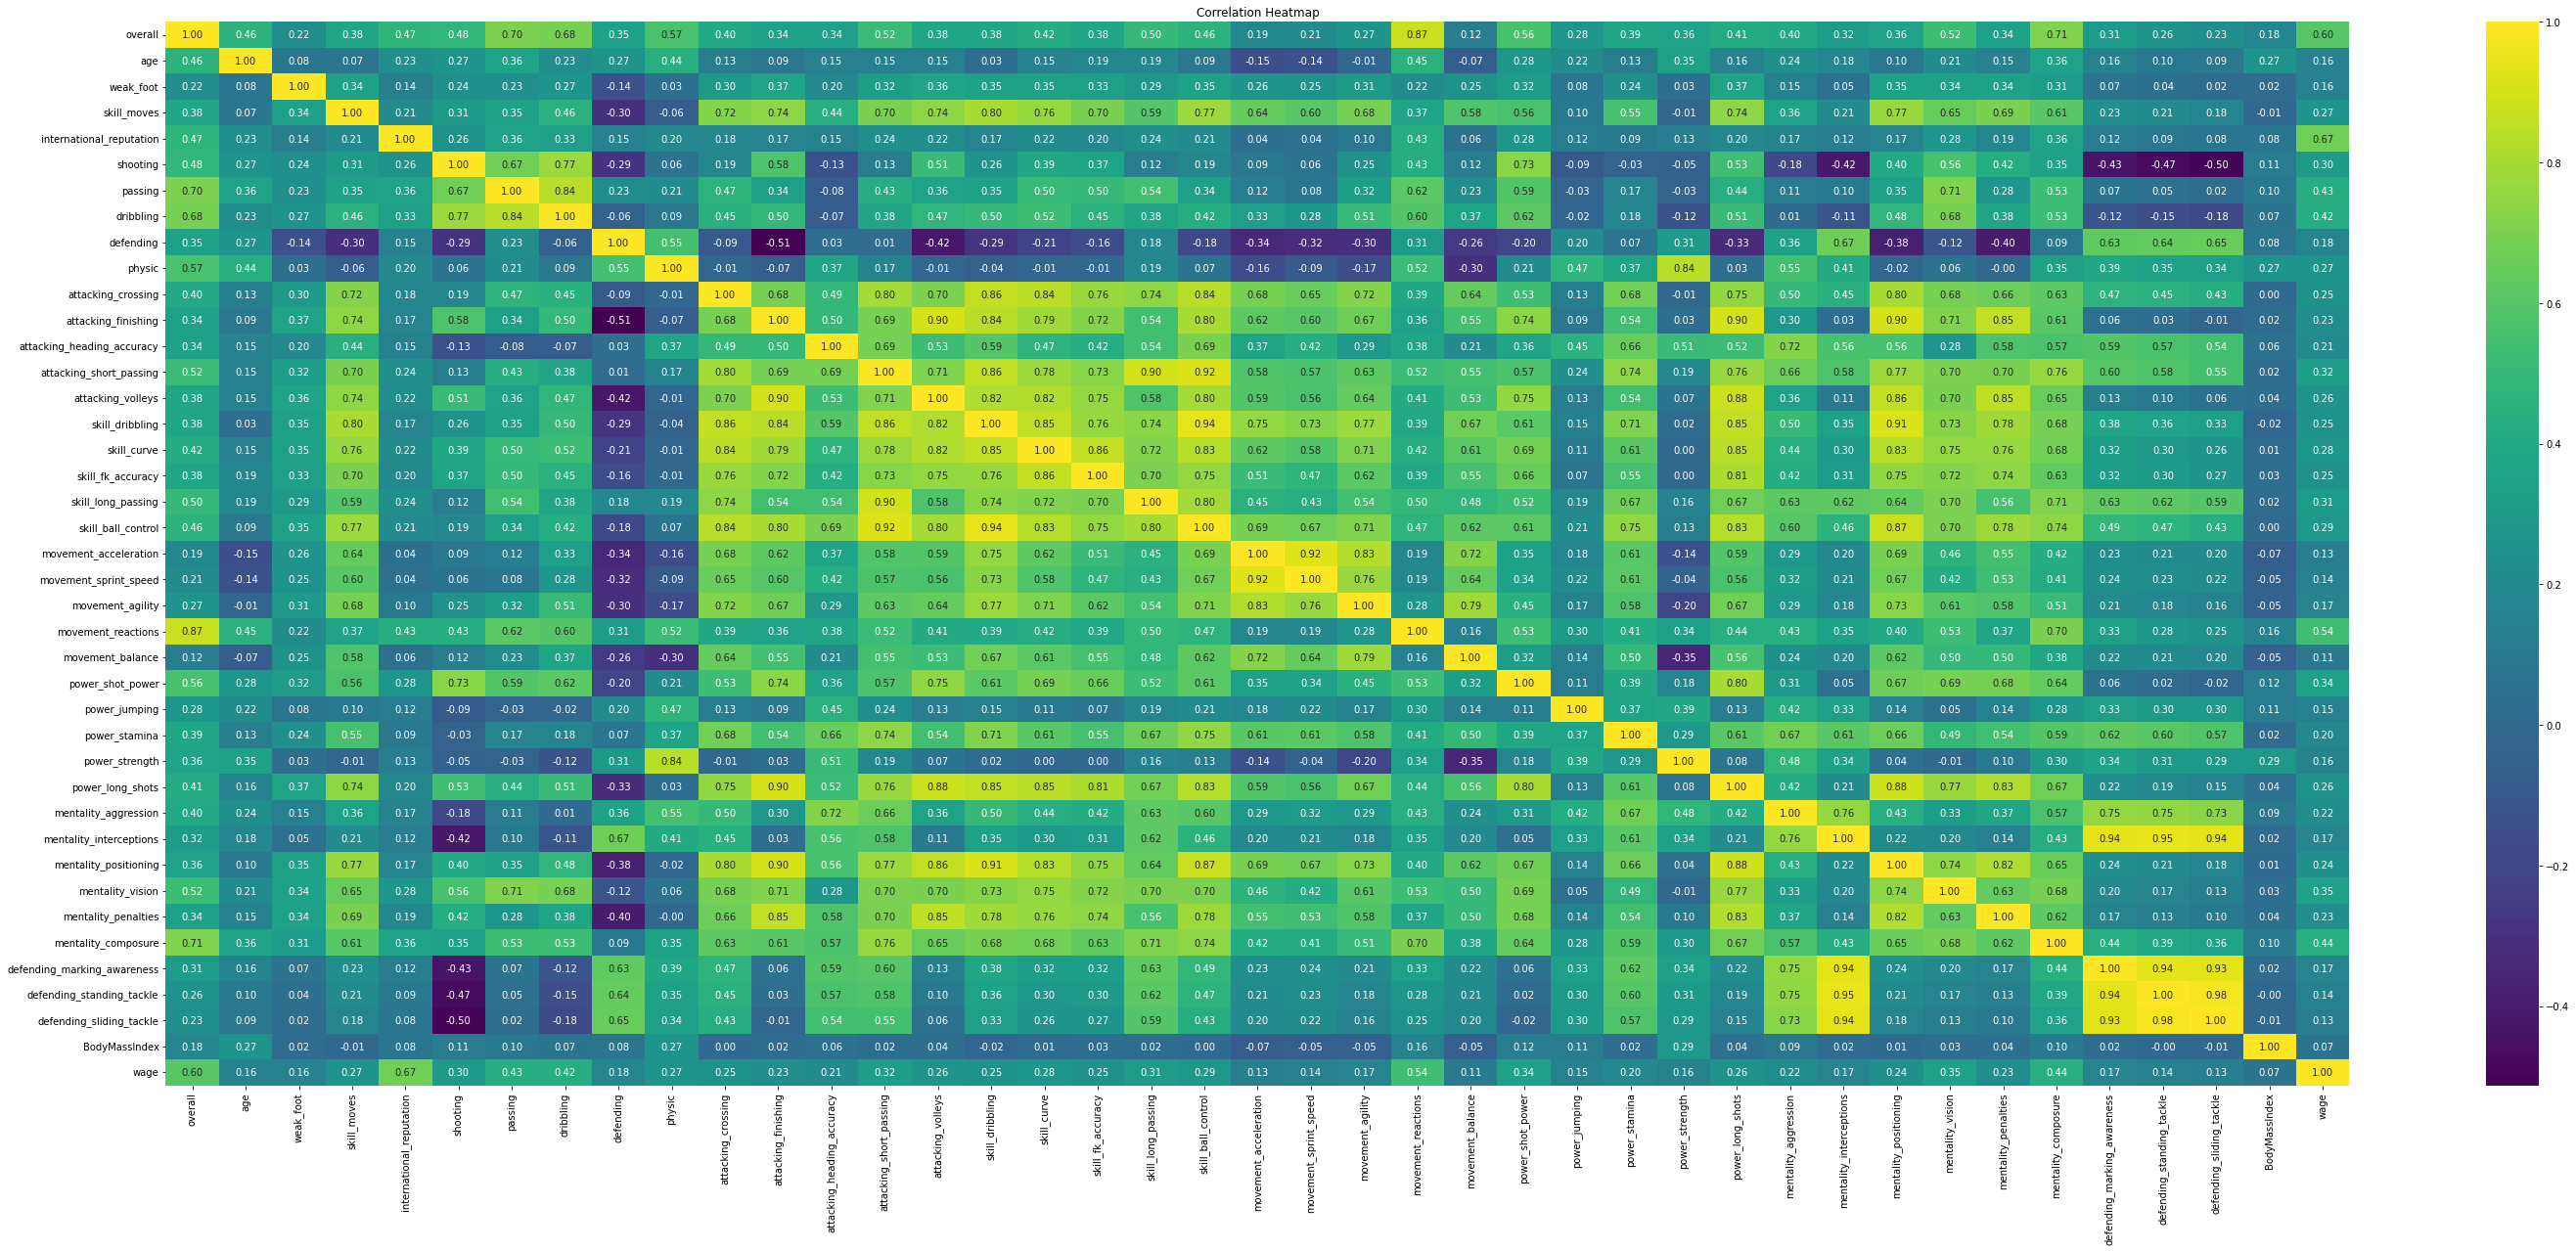

In [154]:
#correlation matrix to see which variables are problematic in terms of collinearity

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

correlation_matrix = df2022.drop(["sofifa_id"], axis=1).corr()

plt.figure(figsize=(50, 20))

sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


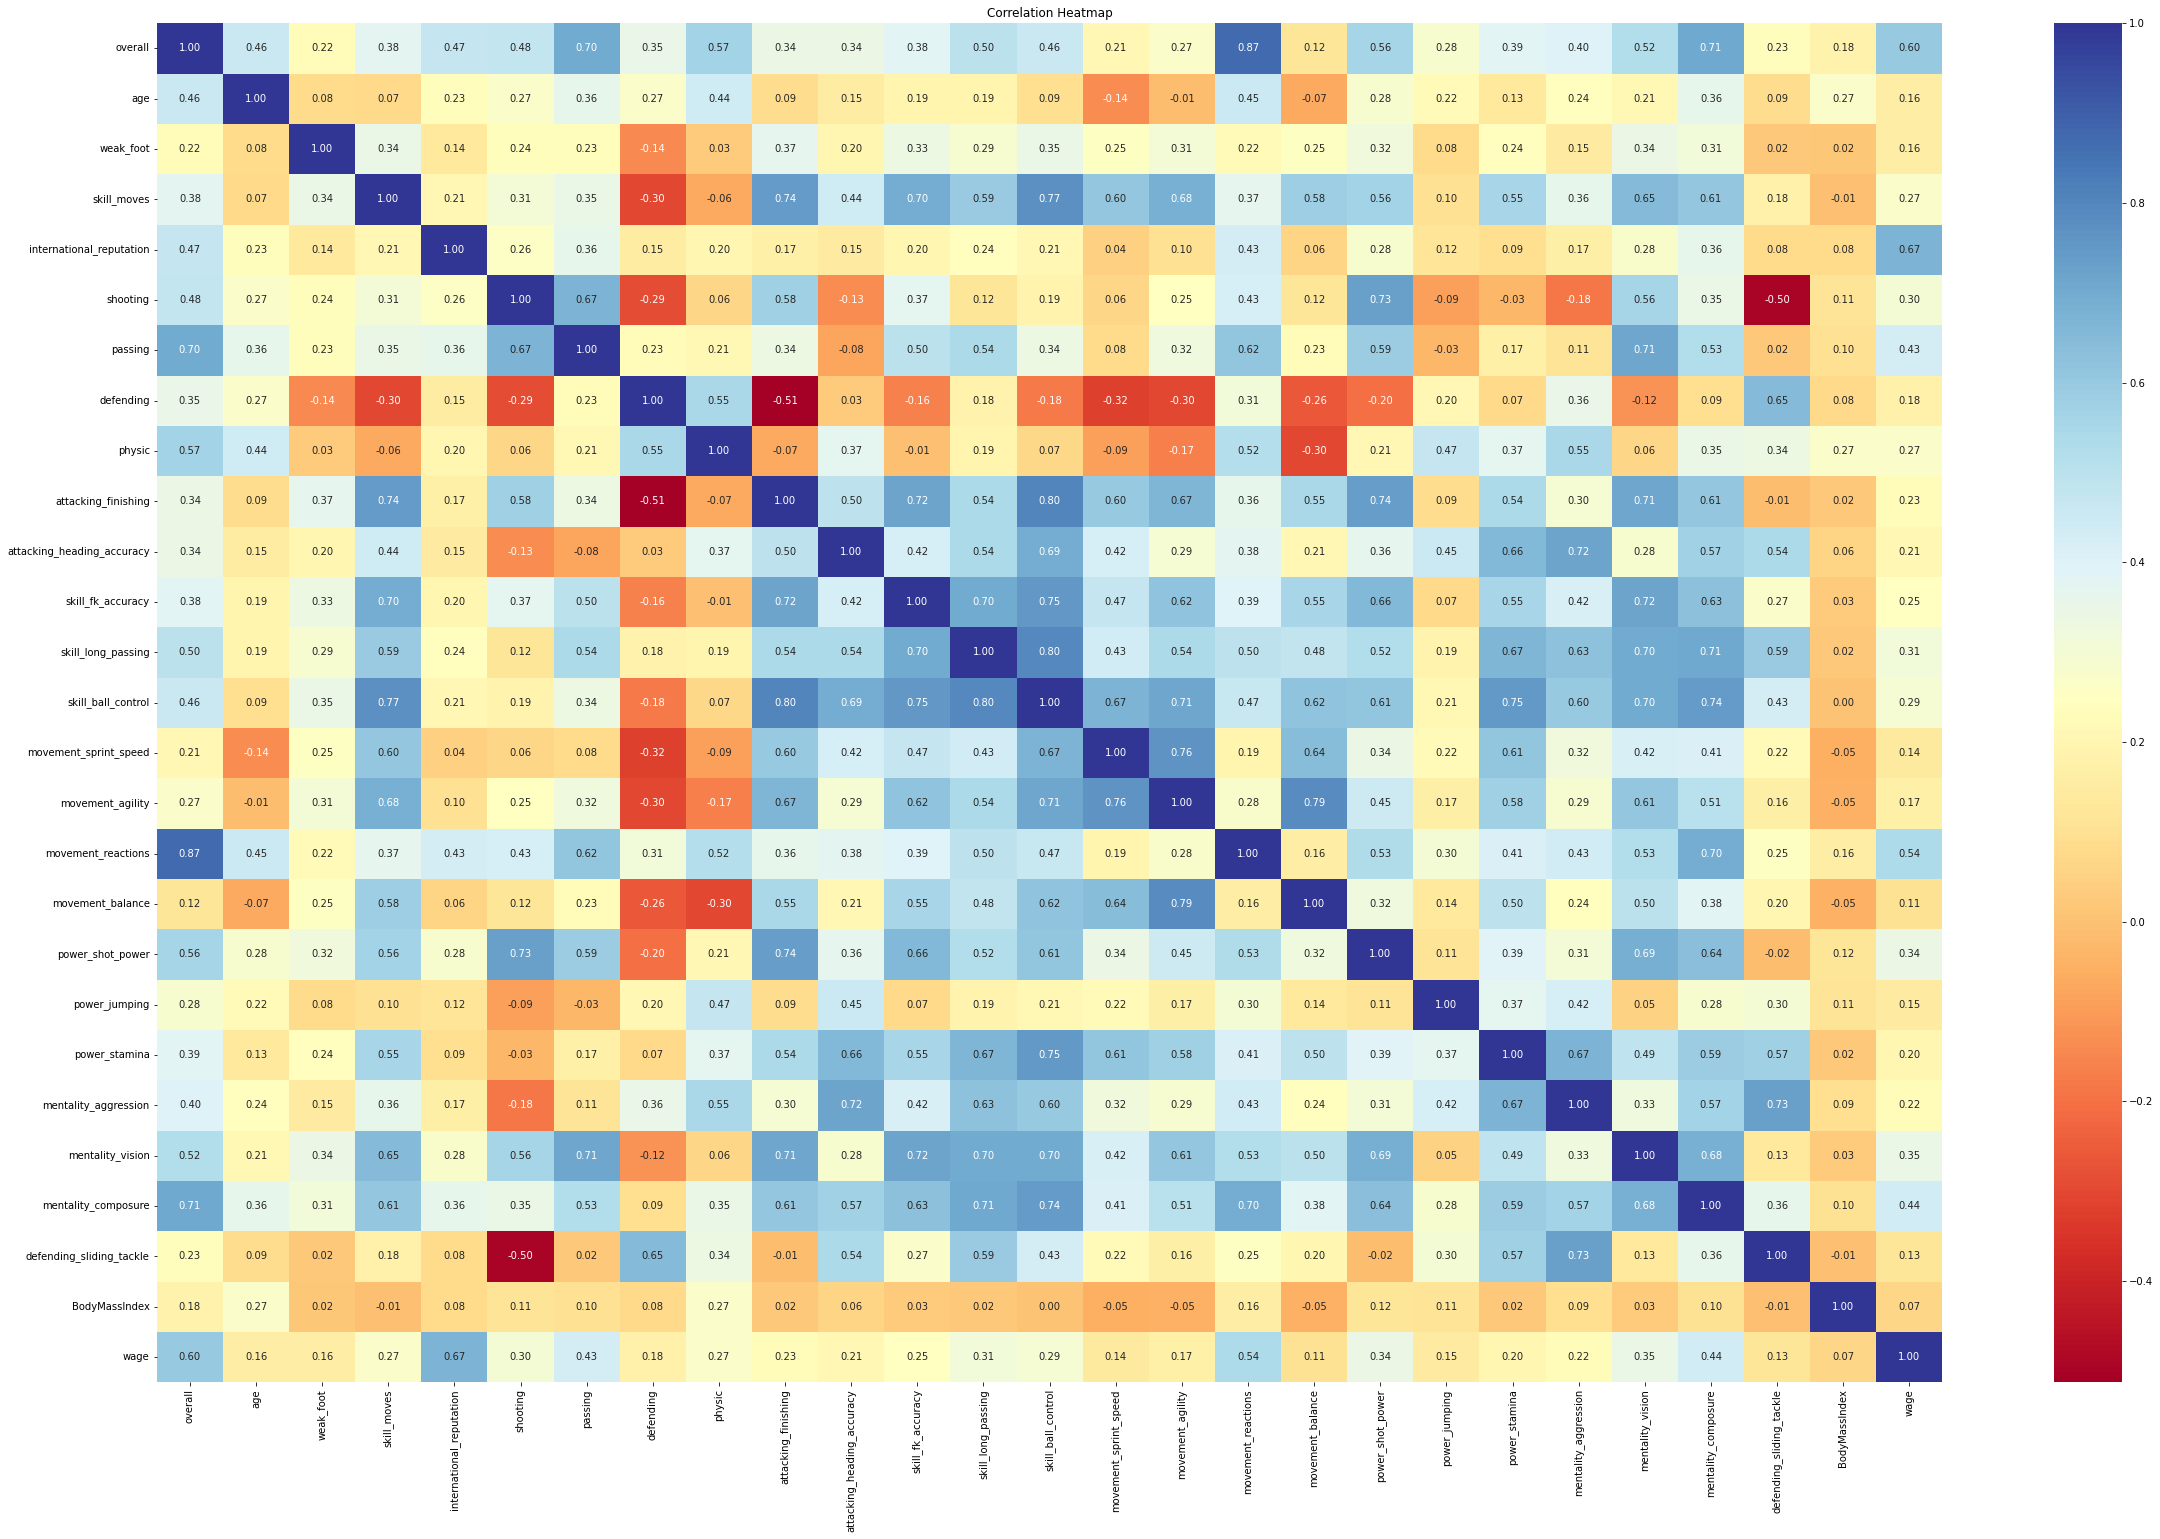

In [155]:
#After examining correlation coefficients between the all pair-features,
#14 variables seem to be discarded because of multicollinearity and curse of dimensionality,
#due to the nature of variables, they can be used interchangeably, so exluding them 
#is vital for our model robustness

collinearated_cols = ['defending_standing_tackle',
                      'skill_dribbling',
                      'mentality_interceptions',
                      'movement_acceleration',
                      'attacking_short_passing',
                      'skill_curve',
                      'attacking_crossing',
                      'defending_marking_awareness',
                      'mentality_positioning',
                      'power_long_shots',
                      'attacking_volleys',
                      'mentality_penalties',
                      'dribbling',
                      'power_strength' ]

#now, we do not have highly correlated features 
correlation_matrix = df2022.drop(collinearated_cols, axis=1).drop("sofifa_id", axis=1).corr()

plt.figure(figsize=(40, 25))

sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [156]:

#eliminating 14 features which were taken into consideration to exclude from data set
df2022.drop(collinearated_cols, axis=1, inplace=True)

df2022_encoded = pd.get_dummies(data=df2022, columns=["preferred_foot","Position_Group"], drop_first=True)
df2022_encoded.head()



,sofifa_id,overall,age,weak_foot,skill_moves,international_reputation,shooting,passing,defending,physic,attacking_finishing,attacking_heading_accuracy,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,mentality_aggression,mentality_vision,mentality_composure,defending_sliding_tackle,BodyMassIndex,wage,preferred_foot_Right,Position_Group_Forward,Position_Group_Goalkeeper,Position_Group_Midfielder
0,158023,93,34,4,4,5,92.0,91.0,34.0,65.0,95,70,94,91,96,80,91,94,95,86,68,72,44,95,96,24,0.002491,320000.0,0,1,0,0
1,209331,89,29,3,4,4,87.0,81.0,45.0,75.0,91,59,69,75,89,91,91,92,91,82,69,85,63,83,90,41,0.002318,270000.0,0,1,0,0
2,183898,87,33,2,5,4,81.0,86.0,48.0,69.0,79,51,88,82,87,83,94,84,76,83,73,78,73,88,86,52,0.002130,160000.0,0,1,0,0
3,204485,86,30,4,5,3,79.0,81.0,38.0,60.0,81,48,78,75,91,79,92,81,88,79,56,75,48,84,84,22,0.002091,220000.0,0,1,0,0
4,208670,84,28,2,5,3,76.0,87.0,50.0,65.0,73,52,78,89,85,77,85,84,78,83,35,79,73,89,79,40,0.001984,170000.0,0,1,0,0


In [157]:
df2022_encoded.shape

(19239, 32)

In [158]:
#categoric features below
categorical_cols = ["weak_foot",
                    "skill_moves",
                    "international_reputation",
                    "preferred_foot_Right",
                    "Position_Group_Forward",
                    "Position_Group_Goalkeeper",
                    "Position_Group_Midfielder"]

#numeric features below 
numerical_cols  =  ['age',
                    'shooting',
                    'passing',
                    'defending',
                    'physic',
                    'attacking_finishing',
                    'attacking_heading_accuracy',
                    'skill_fk_accuracy',
                    'skill_long_passing',
                    'skill_ball_control',
                    'movement_sprint_speed',
                    'movement_agility',
                    'movement_reactions',
                    'movement_balance',
                    'power_shot_power',
                    'power_jumping',
                    'power_stamina',
                    'mentality_aggression',
                    'mentality_vision',
                    'mentality_composure',
                    'defending_sliding_tackle',
                    'BodyMassIndex',
                    'wage']


X = df2022_encoded.drop(["sofifa_id","overall"], axis=1)
y = df2022_encoded[["overall"]]

#we split our data into train and test part
#our test size is 25% 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(14429, 30)
(4810, 30)
(14429, 1)
(4810, 1)


In [159]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#we scale our numeric columns both for test and train,
#to prevent data leakage, our first method is fit_transform and for test part
#we use transform method 

X_train_numeric_scaled = scaler.fit_transform( X_train[numerical_cols] )
X_train_numeric_scaled = pd.DataFrame( X_train_numeric_scaled, index=X_train.index, columns=numerical_cols)

X_test_numeric_scaled = scaler.transform( X_test[numerical_cols] )
X_test_numeric_scaled = pd.DataFrame( X_test_numeric_scaled, index=X_test.index, columns=numerical_cols)


#we reunite numeric and categoric part, numeric part has already been scaled
X_train_scaled = pd.concat([ X_train_numeric_scaled, X_train[categorical_cols] ] , join="inner", axis=1, ignore_index=True)
X_test_scaled = pd.concat([ X_test_numeric_scaled, X_test[categorical_cols] ] , join="inner", axis=1, ignore_index=True)



print(f"Train data set has been scaled and row number is: {X_train_scaled.shape[0]} \n"
      f"and number of columns is: {X_train_scaled.shape[1]}")
print(10 * str('*******'))

print(f"Test data set has been scaled and row number is: {X_test_scaled.shape[0]} \n"
      f"and number of columns is: {X_test_scaled.shape[1]}")
print(10 * str('*******'))


print(f"Train data set target row number is: {y_train.shape[0]} \n"
      f"and number of columns is: {y_train.shape[1]}")
print(10 * str('*******'))

print(f"Train data set target row number is: {y_test.shape[0]} \n"
      f"and number of columns is: {y_test.shape[1]}")



Train data set has been scaled and row number is: 14429 
and number of columns is: 30
**********************************************************************
Test data set has been scaled and row number is: 4810 
and number of columns is: 30
**********************************************************************
Train data set target row number is: 14429 
and number of columns is: 1
**********************************************************************
Train data set target row number is: 4810 
and number of columns is: 1


### Model1- Linear Regression

In [160]:
from sklearn.linear_model import LinearRegression 

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train )

preds = linreg.predict(X_test_scaled )


In [161]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

r2 = r2_score(y_test, preds)
mse = mean_squared_error(y_test,  preds)
root_mse = np.sqrt(mse)
mae = mean_absolute_error(y_test,  preds)
mape = mean_absolute_percentage_error(y_test, preds)
            

print(f"Linear Model r-square is: {round(r2, 3)}")
print(f"Linear Model mean squarred error is: {round(mse, 3)}")
print(f"Linear Model root mean squarred error is: {round(root_mse, 3)}")
print(f"Linear Model mean absolute error is: {round(mae, 3)}")
print(f"Linear Model mean absolute percentage error is: {round(mape, 3)}")

linear_results = pd.DataFrame(np.array([r2,mse,root_mse,mae,mape]).reshape(-1,5), index=np.arange(0,1), 
                             columns=["r2","mse","root_mse","mae","mape"])
linear_results["Model"] = "Linear Model"

linear_results


Linear Model r-square is: 0.906
Linear Model mean squarred error is: 4.504
Linear Model root mean squarred error is: 2.122
Linear Model mean absolute error is: 1.679
Linear Model mean absolute percentage error is: 0.026


,r2,mse,root_mse,mae,mape,Model
0,0.906216,4.503925,2.122245,1.67857,0.026091,Linear Model


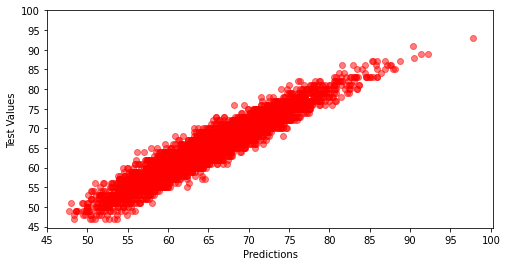

In [162]:

plt.figure(figsize=(8,4))

plt.scatter(preds, y_test, color='red', label='Test Values', alpha=0.5 )
plt.xlabel('Predictions')
plt.ylabel('Test Values')

plt.xticks(np.arange(45,101,5))
plt.yticks(np.arange(45,101,5))

plt.show()


### Model2- Ridge and Lasso

In [164]:

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

params = {"alpha": [10, 1, 0.1, 0.01, 0.001] }
lasreg = Lasso()

gridsearch_lasso = GridSearchCV(estimator=lasreg, param_grid=params, scoring="neg_mean_squared_error" , cv=5 )

gridsearch_lasso.fit(X_train_scaled, y_train )
best_estimator_lasso = gridsearch_lasso.best_estimator_
best_score_lasso = gridsearch_lasso.best_score_


print(f"Best estimator for Lasso is: {best_estimator_lasso}")
print(f"Best score in terms of Mean Squarred Error is: {abs(best_score_lasso)}")


ridreg = Ridge()

gridsearch_ridge = GridSearchCV(estimator=ridreg, param_grid=params, scoring="neg_mean_squared_error" , cv=5 )

gridsearch_ridge.fit(X_train_scaled, y_train )
best_estimator_ridge = gridsearch_ridge.best_estimator_
best_score_ridge = gridsearch_ridge.best_score_


print(f"Best estimator for Ridge is: {best_estimator_ridge}")
print(f"Best score in terms of Mean Squarred Error is: {abs(best_score_ridge)}")



Best estimator for Lasso is: Lasso(alpha=0.001)
Best score in terms of Mean Squarred Error is: 4.636124608895612
Best estimator for Ridge is: Ridge(alpha=1)
Best score in terms of Mean Squarred Error is: 4.634813429963633


### Model3- DecisionTree Regressor

In [165]:
from sklearn.tree import DecisionTreeRegressor

dtreg = DecisionTreeRegressor(max_depth=6, max_features=10, random_state=0, min_samples_split=200, criterion="squared_error" )
dtreg.fit(X_train, y_train)

preds = dtreg.predict(X_test)
preds



array([64.98070175, 62.40520446, 56.29110512, ..., 71.78287462,
       66.24522293, 69.85414585])

In [166]:

r2 = r2_score(y_test, preds)
mse = mean_squared_error(y_test,  preds)
root_mse = np.sqrt(mse)
mae = mean_absolute_error(y_test,  preds)
mape = mean_absolute_percentage_error(y_test, preds)
            

print(f"Decision Tree Model r-square is: {round(r2, 3)}")
print(f"Decision Tree Model mean squarred error is: {round(mse, 3)}")
print(f"Decision Tree Model root mean squarred error is: {round(root_mse, 3)}")
print(f"Decision Tree Model mean absolute error is: {round(mae, 3)}")
print(f"Decision Tree Model mean absolute percentage error is: {round(mape, 3)}")


dt_results = pd.DataFrame(np.array([r2,mse,root_mse,mae,mape]).reshape(-1,5), index=np.arange(0,1), 
                             columns=["r2","mse","root_mse","mae","mape"])

dt_results["Model"] = "DecisionTree"
dt_results


Decision Tree Model r-square is: 0.872
Decision Tree Model mean squarred error is: 6.167
Decision Tree Model root mean squarred error is: 2.483
Decision Tree Model mean absolute error is: 1.919
Decision Tree Model mean absolute percentage error is: 0.03


,r2,mse,root_mse,mae,mape,Model
0,0.871578,6.167362,2.483417,1.918579,0.030209,DecisionTree


### Model3- RandomForest Regressor

In [167]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor(n_estimators=200, max_depth=5, max_features=10, random_state=0, min_samples_split=200, criterion="squared_error"  )
rfreg.fit(X_train, y_train )

preds = rfreg.predict(X_test)
preds


array([64.11170352, 63.02438446, 55.87198586, ..., 71.60578916,
       66.70621373, 71.94684969])

In [168]:

r2 = r2_score(y_test, preds)
mse = mean_squared_error(y_test,  preds)
root_mse = np.sqrt(mse)
mae = mean_absolute_error(y_test,  preds)
mape = mean_absolute_percentage_error(y_test, preds)
            

print(f"Random Forest Model r-square is: {round(r2, 3)}")
print(f"Random Forest Model mean squarred error is: {round(mse, 3)}")
print(f"Random Forest Model root mean squarred error is: {round(root_mse, 3)}")
print(f"Random Forest Model mean absolute error is: {round(mae, 3)}")
print(f"Random Forest Model mean absolute percentage error is: {round(mape, 3)}")


rf_results = pd.DataFrame(np.array([r2,mse,root_mse,mae,mape]).reshape(-1,5), index=np.arange(0,1), 
                             columns=["r2","mse","root_mse","mae","mape"])

rf_results["Model"] = "RandomForest"
rf_results


Random Forest Model r-square is: 0.92
Random Forest Model mean squarred error is: 3.838
Random Forest Model root mean squarred error is: 1.959
Random Forest Model mean absolute error is: 1.474
Random Forest Model mean absolute percentage error is: 0.023


,r2,mse,root_mse,mae,mape,Model
0,0.92008,3.838111,1.95911,1.474299,0.023392,RandomForest


### Model 4- Xgboost Regressor

In [169]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 8, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'reg_alpha': [0.1, 0.5]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)


# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = abs(grid_search.best_score_)

print("Best Parameters:", best_params)
print("Mean squarred error:", best_score)


best_model = grid_search.best_estimator_
xgb_score = best_model.score(X_test, y_test)


print("Xgboost score:", xgb_score)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'reg_alpha': 0.1}
Mean squarred error: 1.1247567773387175
Xgboost score: 0.9773806823472238


### Model 5- LightGBM Regressor

In [55]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 8, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'reg_alpha': [0.1, 0.5]
    
}

grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = abs(grid_search.best_score_ )

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
lgbm_score = best_model.score(X_test, y_test)


print("Light GBM score:", lgbm_score)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'reg_alpha': 0.5}
Best Score: 1.172955737121027
Light GBM score: 0.9759110911440093


## Part2

In [170]:

#transfermarkt data, real footballer statistics 
df_transfermarkt = pd.read_csv("transfermarkt_real_data.csv" , encoding="utf-8", sep=";", on_bad_lines='skip')

df_transfermarkt.head(2)


,Column1,nationality,position,squad,age,birth_year,value,height,position2,foot,league,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,minutes_90s,shots_total,shots_on_target,shots_free_kicks,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,xa_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_pressure,passes_switches,crosses,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_ground,passes_low,passes_high,passes_left_foot,passes_right_foot,passes_head,throw_ins,passes_other_body,passes_offsides,passes_oob,passes_intercepted,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,pressures,pressure_regains,pressure_regain_pct,pressures_def_3rd,pressures_mid_3rd,pressures_att_3rd,blocks,blocked_shots,blocked_shots_saves,blocked_passes,interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,pass_targets,passes_received,passes_received_pct,miscontrols,dispossessed,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,wins_gk,draws_gk,losses_gk,clean_sheets,clean_sheets_pct,pens_att_gk,pens_allowed,pens_saved,pens_missed_gk,minutes_90s_gk,free_kick_goals_against_gk,corner_kick_goals_against_gk,own_goals_against_gk,psxg_gk,psnpxg_per_shot_on_target_against,psxg_net_gk,psxg_net_per90_gk,passes_completed_launched_gk,passes_launched_gk,passes_pct_launched_gk,passes_gk,passes_throws_gk,pct_passes_launched_gk,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk,goalsm,assistsm,pens_madem,pens_attm,cards_yellowm,cards_redm,goals_per90m,assists_per90m,goals_assists_per90m,goals_pens_per90m,goals_assists_pens_per90m,xgm,npxgm,xam,xg_per90m,xa_per90m,xg_xa_per90m,npxg_per90m,npxg_xa_per90m,minutes_90sm,shots_totalm,shots_on_targetm,shots_free_kicksm,shots_on_target_pctm,shots_total_per90m,shots_on_target_per90m,goals_per_shotm,goals_per_shot_on_targetm,npxg_per_shotm,xg_netm,npxg_netm,passes_completedm,passesm,passes_pctm,passes_total_distancem,passes_progressive_distancem,passes_completed_shortm,passes_shortm,passes_pct_shortm,passes_completed_mediumm,passes_mediumm,passes_pct_mediumm,passes_completed_longm,passes_longm,passes_pct_longm,xa_netm,assisted_shotsm,passes_into_final_thirdm,passes_into_penalty_aream,crosses_into_penalty_aream,progressive_passesm,passes_livem,passes_deadm,passes_free_kicksm,through_ballsm,passes_pressurem,passes_switchesm,crossesm,corner_kicksm,corner_kicks_inm,corner_kicks_outm,corner_kicks_straightm,passes_groundm,passes_lowm,passes_highm,passes_left_footm,passes_right_footm,passes_headm,throw_insm,passes_other_bodym,passes_offside

In [171]:
df_transfermarkt.shape

(2644, 400)

In [172]:

#we use only necessary features with our expert opinion,
#the features that we use are critical for our model 

df_transfermarkt = df_transfermarkt[['player_names',
'value',
'minutes',
'cards_yellow',
'cards_red',
'goals_assists_per90',
'xg_xa_per90',
'shots_on_target_per90',
'goals_per_shot',
'passes_pct',
'passes_pct_short',
'passes_pct_medium',
'passes_pct_long',
'passes_into_final_third',
'passes_into_penalty_area',
'progressive_passes',
'tackles',
'tackles_won',
'dribble_tackles_pct',
'blocked_shots',
'blocked_passes',
'clearances',
'errors',
'own_goals',
'ball_recoveries',
'aerials_won_pct',]]

df_transfermarkt.head(2)


,player_names,value,minutes,cards_yellow,cards_red,goals_assists_per90,xg_xa_per90,shots_on_target_per90,goals_per_shot,passes_pct,passes_pct_short,passes_pct_medium,passes_pct_long,passes_into_final_third,passes_into_penalty_area,progressive_passes,tackles,tackles_won,dribble_tackles_pct,blocked_shots,blocked_passes,clearances,errors,own_goals,ball_recoveries,aerials_won_pct
0,Martin Aguirregabiria,4000000,2099,5,1,0.09,0.08,0.04,0.33,71.2,85.5,77.0,40.7,36,14,60,50,22,50.0,8,31,68,1,0,207,53.5
1,Oliver Burke,4000000,1429,2,0,0.19,0.27,0.57,0.05,67.9,78.0,64.2,43.8,9,6,18,20,5,39.1,2,23,14,0,0,75,37.7


In [173]:
df_transfermarkt.shape

(2644, 26)

In [174]:

fifa_playernames = pd.read_csv("players_22.csv", usecols=(0,1))

shortnames = list()

for i in range(len(fifa_playernames.player_url)):
    shortnames.append( fifa_playernames.player_url[i].split("/")[-2].replace("-","") )


fifa_playernames["shortnames"] = shortnames

game_df = fifa_playernames.merge(df2022_encoded, how="inner", on="sofifa_id")

game_df = game_df[["shortnames","overall","age","BodyMassIndex",
                   "preferred_foot_Right","Position_Group_Forward","Position_Group_Goalkeeper",
                   "Position_Group_Midfielder"]]

game_df.head()



,shortnames,overall,age,BodyMassIndex,preferred_foot_Right,Position_Group_Forward,Position_Group_Goalkeeper,Position_Group_Midfielder
0,lionelmessi,93,34,0.002491,0,1,0,0
1,robertlewandowski,92,32,0.002367,1,1,0,0
2,cronaldodossantosaveiro,91,36,0.002374,1,1,0,0
3,neymardasilvasantosjr,91,29,0.002220,1,1,0,0
4,kevindebruyne,91,30,0.002137,1,0,0,1


In [176]:


df_transfermarkt["player_names"] = df_transfermarkt["player_names"].str.lower()
df_transfermarkt["player_names"]  = df_transfermarkt["player_names"].str.replace(" ","")

df_transfermarkt.head(2)


,player_names,value,minutes,cards_yellow,cards_red,goals_assists_per90,xg_xa_per90,shots_on_target_per90,goals_per_shot,passes_pct,passes_pct_short,passes_pct_medium,passes_pct_long,passes_into_final_third,passes_into_penalty_area,progressive_passes,tackles,tackles_won,dribble_tackles_pct,blocked_shots,blocked_passes,clearances,errors,own_goals,ball_recoveries,aerials_won_pct
0,martinaguirregabiria,4000000,2099,5,1,0.09,0.08,0.04,0.33,71.2,85.5,77.0,40.7,36,14,60,50,22,50.0,8,31,68,1,0,207,53.5
1,oliverburke,4000000,1429,2,0,0.19,0.27,0.57,0.05,67.9,78.0,64.2,43.8,9,6,18,20,5,39.1,2,23,14,0,0,75,37.7


In [177]:

game_real_merged = game_df.merge(df_transfermarkt, how="inner", left_on="shortnames", right_on="player_names")
game_real_merged.head()


,shortnames,overall,age,BodyMassIndex,preferred_foot_Right,Position_Group_Forward,Position_Group_Goalkeeper,Position_Group_Midfielder,player_names,value,minutes,cards_yellow,cards_red,goals_assists_per90,xg_xa_per90,shots_on_target_per90,goals_per_shot,passes_pct,passes_pct_short,passes_pct_medium,passes_pct_long,passes_into_final_third,passes_into_penalty_area,progressive_passes,tackles,tackles_won,dribble_tackles_pct,blocked_shots,blocked_passes,clearances,errors,own_goals,ball_recoveries,aerials_won_pct
0,lionelmessi,93,34,0.002491,0,1,0,0,lionelmessi,112000000,2880,4,0,1.44,1.08,1.97,0.13,79.4,87.6,82.4,55.4,208,126,319,13,9,0.0,0,7,1,0,0,127,60.0
1,robertlewandowski,92,32,0.002367,1,1,0,0,robertlewandowski,56000000,2759,5,0,1.24,1.08,1.92,0.22,75.6,83.6,74.4,70.5,36,43,69,19,12,12.5,3,13,13,0,0,105,56.9
2,kevindebruyne,91,30,0.002137,1,0,0,1,kevindebruyne,120000000,2791,3,0,1.06,0.84,0.87,0.11,74.6,82.7,81.5,58.6,175,121,261,44,28,19.0,2,29,19,1,0,232,45.0
3,janoblak,91,28,0.002462,1,0,1,0,janoblak,90000000,3395,0,0,0.00,0.00,0.00,0.00,58.1,98.5,97.7,45.0,13,1,1,0,0,0.0,0,0,0,0,0,148,0.0
4,kylianmbappe,91,22,0.002204,1,1,0,0,kylianmbappe,180000000,1513,0,0,1.37,1.52,2.91,0.20,76.8,82.6,75.1,70.0,23,26,48,4,2,11.1,3,5,1,0,0,69,50.0


In [179]:
game_real_merged.shape

(1661, 34)

In [181]:

X1 = game_real_merged.drop(["shortnames","overall","player_names"], axis=1 )
y1 = game_real_merged[["overall"]]

#we split our data into train and test part
#our test size is 25% 

from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)


(1328, 31)
(333, 31)
(1328, 1)
(333, 1)


### Model1- Linear Regression

In [182]:

linreg2 = LinearRegression()
linreg2.fit(X1_train, y1_train )


predictions = linreg2.predict(X1_test )


In [183]:

r2_ = r2_score(y1_test, predictions)
mse_ = mean_squared_error(y1_test, predictions)
root_mse_ = np.sqrt(mse_)
mae_ = mean_absolute_error(y1_test, predictions)
mape_ = mean_absolute_percentage_error(y1_test, predictions)
            

print(f"Linear Model r-square is: {round(r2_, 3)}")
print(f"Linear Model mean squarred error is: {round(mse_, 3)}")
print(f"Linear Model root mean squarred error is: {round(root_mse_, 3)}")
print(f"Linear Model mean absolute error is: {round(mae_, 3)}")
print(f"Linear Model mean absolute percentage error is: {round(mape_, 3)}")


p2_linear_results = pd.DataFrame(np.array([r2_,mse_,root_mse_,mae_,mape_]).reshape(-1,5), index=np.arange(0,1), 
                             columns=["r2","mse","root_mse","mae","mape"])

p2_linear_results["Model"] = "Linear Model"

p2_linear_results


Linear Model r-square is: 0.672
Linear Model mean squarred error is: 9.205
Linear Model root mean squarred error is: 3.034
Linear Model mean absolute error is: 2.441
Linear Model mean absolute percentage error is: 0.033


,r2,mse,root_mse,mae,mape,Model
0,0.671805,9.205032,3.033979,2.441182,0.032944,Linear Model


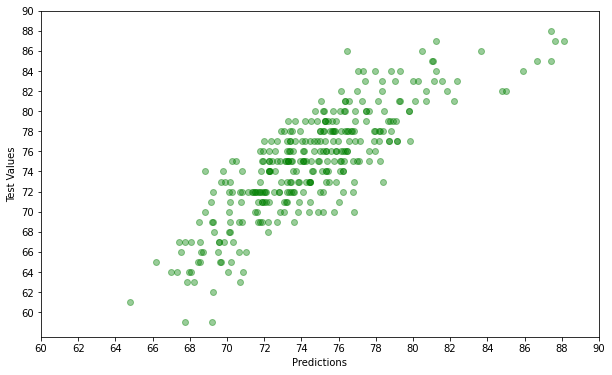

In [184]:

plt.figure(figsize=(10,6))

plt.scatter(predictions, y1_test, color='green', label='Test Values', alpha=0.4 )
plt.xlabel('Predictions')
plt.ylabel('Test Values')

plt.xticks(np.arange(60,91,2))
plt.yticks(np.arange(60,91,2))

plt.show()


### Model2- Lasso and Ridge Regression


In [185]:

params = {"alpha": [10, 1, 0.1, 0.01, 0.001] }

lasreg = Lasso()

gridsearch_lasso = GridSearchCV(estimator=lasreg, param_grid=params, scoring="neg_mean_squared_error" , cv=5 )
gridsearch_lasso.fit(X1_train, y1_train )

best_estimator_lasso = gridsearch_lasso.best_estimator_
best_score_lasso = gridsearch_lasso.best_score_

print("Lasso Model", "******"*10)
print(f"Best estimator for Lasso is: {best_estimator_lasso}")
print(f"Best score in terms of Mean Squarred Error is: {abs(best_score_lasso)}")

best_lasso_model = gridsearch_lasso.best_estimator_
preds = best_lasso_model.predict(X1_test)

r2 = r2_score(y1_test, preds)
print(f"In Lasso, Best score in terms of R squarred is: {r2}")


ridreg = Ridge()

gridsearch_ridge = GridSearchCV(estimator=ridreg, param_grid=params, scoring="neg_mean_squared_error" , cv=5 )

gridsearch_ridge.fit(X1_train, y1_train )
best_estimator_ridge = gridsearch_ridge.best_estimator_
best_score_ridge = gridsearch_ridge.best_score_

print("\n")
print("Ridge Model", "******"*10)
print(f"Best estimator for Ridge is: {best_estimator_ridge}")
print(f"Best score in terms of Mean Squarred Error is: {abs(best_score_ridge)}")

best_ridge_model = gridsearch_ridge.best_estimator_
preds = best_ridge_model.predict(X1_test)

r2 = r2_score(y1_test, preds)
print(f"In Rıdge, Best score in terms of R squarred is: {r2}")



Lasso Model ************************************************************
Best estimator for Lasso is: Lasso(alpha=0.1)
Best score in terms of Mean Squarred Error is: 12.996075076549669
In Lasso, Best score in terms of R squarred is: 0.6720926920502605


Ridge Model ************************************************************
Best estimator for Ridge is: Ridge(alpha=10)
Best score in terms of Mean Squarred Error is: 13.5962956369516
In Rıdge, Best score in terms of R squarred is: 0.6711085094268014


### Model3- DecisionTree Regressor 


In [187]:

params = {"max_depth": [4, 5, 6, 8, 10],
         "max_features": [5, 8, 10, 12],
         "min_samples_split": [100, 200]}

p2_dtreg = DecisionTreeRegressor()

gridsearch = GridSearchCV(estimator=p2_dtreg, param_grid=params, scoring="neg_mean_squared_error" , cv=5 )
gridsearch.fit(X1_train, y1_train )

best_parameters = gridsearch.best_params_
best_score = gridsearch.best_score_


print(f"Best parameters are: {best_parameters}")
print(f"Best score in terms of Mean Squarred Error is: {abs(best_score)}")


best_decisiontree_model = gridsearch.best_estimator_
preds = best_decisiontree_model.predict(X1_test)

r2 = r2_score(y1_test, preds)
print(f"In Decision Tree, Best score in terms of R squarred is: {r2}")

#R-squarred value is not meaningful for decision tree regressor,
#comparing MSE values with previous model, we can see the improvement


Best parameters are: {'max_depth': 8, 'max_features': 12, 'min_samples_split': 100}
Best score in terms of Mean Squarred Error is: 13.704354811798712
In Decision Tree, Best score in terms of R squarred is: 0.5241055175548315


### Model4- Random Forest Regressor

In [188]:

params = {
         "n_estimators": [25, 50],
         "max_depth": [4, 5, 6, 8, None],
         "max_features": [5, 7, 8, None],
         "min_samples_split": [50, 100]}

p2_rfreg = RandomForestRegressor()

gridsearch = GridSearchCV(estimator=p2_rfreg, param_grid=params, scoring="neg_mean_squared_error" , cv=5 )
gridsearch.fit(X1_train, y1_train )

best_parameters = gridsearch.best_params_
best_score = gridsearch.best_score_


print(f"Best parameters are: {best_parameters}")
print(f"Best score in terms of Mean Squarred Error is: {abs(best_score)}")


best_randomforest_model = gridsearch.best_estimator_
preds = best_randomforest_model.predict(X1_test)

r2 = r2_score(y1_test, preds)
print(f"In Random forest, Best score in terms of R squarred is: {r2}")

#R-squarred value is not meaningful for random forest tree regressor,
#comparing MSE values with previous model, we can see the improvement


Best parameters are: {'max_depth': 8, 'max_features': None, 'min_samples_split': 50, 'n_estimators': 50}
Best score in terms of Mean Squarred Error is: 8.852002130192641
In Random forest, Best score in terms of R squarred is: 0.7515933034241468


### Model5 - XGBoost Regressor

In [189]:

xgb = XGBRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 8, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'reg_alpha': [0.1, 0.5]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X1_train, y1_train)


# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = abs(grid_search.best_score_)

print("Best Parameters:", best_params)
print("Mean squarred error:", best_score)


best_model = grid_search.best_estimator_
xgb_score = best_model.score(X1_test, y1_test)

print("Xgboost score:", xgb_score)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 100, 'reg_alpha': 0.5}
Mean squarred error: 8.815521558404674
Xgboost score: 0.7426457166940026


### Model6 - LightGBM Regressor

In [190]:

lgbm = LGBMRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 8, None],
    'learning_rate': [0.1, 0.01, 0.001],
    'reg_alpha': [0.1, 0.5]
    
}

grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X1_train, y1_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = abs(grid_search.best_score_ )

print("Best Parameters:", best_params)
print("Mean squarred error:", best_score)

best_model = grid_search.best_estimator_
lgbm_score = best_model.score(X1_test, y1_test)


print("Light GBM score:", lgbm_score)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'reg_alpha': 0.1}
Mean squarred error: 8.394406677192876
Light GBM score: 0.7693061563129028


In summary, while the negation of the mean squared error is used for optimization during GridSearchCV, the actual performance evaluation uses the non-negated mean squared error. Therefore, the neg_mean_squared_error score reported during the optimization process may seem lower (more negative) than the mean squared error you compute directly when evaluating the model. This is a normal part of scikit-learn's convention for maximizing scores during optimization.

In [191]:
lgbm_ = LGBMRegressor(learning_rate= 0.1, max_depth= 5, n_estimators= 50, reg_alpha= 0.1)
lgbm_.fit(X1_train, y1_train)


predictions = lgbm_.predict(X1_test)


mse_ = mean_squared_error(y1_test, predictions)
mae_ = mean_absolute_error(y1_test, predictions)


In [192]:
mse_, mae_

(6.470366383892229, 1.9601999848067349)

In [193]:
xgm_ = XGBRegressor(learning_rate= 0.1, max_depth= None, n_estimators= 100, reg_alpha= 0.5)
xgm_.fit(X1_train, y1_train)


predictions_ = xgm_.predict(X1_test)


mse__ = mean_squared_error(y1_test, predictions_)
mae__ = mean_absolute_error(y1_test, predictions_)


In [194]:
mse__, mae__

(7.218122845585659, 2.042107258473073)